In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn  as sns

In [2]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [3]:
combine= pd.read_csv('tw.csv')

In [4]:
combine.shape

(1461, 4)

In [5]:
combine.head()

,label,tweet,Unnamed: 2,Unnamed: 3
0,1,"Jade plant 🌱, happy world environmental day #environmentallyfriendly #jade #plants #gogreen #kota #kotanagarnigam… https://t.co/BRJok6bMdq",Delighted to see India's @MinOfPower making it easier to procure #renewableelectricity for businesses. RE100 has be… https://t.co/G3GYoYl4tj,theRE100
1,-1,"RT @divyeshjoshi78: Banning FEW ITEM is not solution, #recycling is\n\nurge to @GovernmentIndia @PMOIndia @BJP4India @moefcc @minmsme @NITIA…",NaN,NaN
2,0,@CPMumbaiPolice @DGPAssamPolice @mayor_mumbai @GovernmentIndia @CMOMaharashtra # cp sir help us pls . Oshiwara st p… https://t.co/Iyj7uohait,NaN,NaN
3,-1,"RT @divyeshjoshi78: Banning FEW ITEM is not solution, #recycling is\n\nurge to @GovernmentIndia @PMOIndia @BJP4India @moefcc @minmsme @NITIA…",NaN,NaN
4,-1,"Banning FEW ITEM is not solution, #recycling is\n\nurge to @GovernmentIndia @PMOIndia @BJP4India @moefcc @minmsme… https://t.co/XfLl3gzw9H",NaN,NaN


In [6]:
combine[combine['label']==-1].head(10)

,label,tweet,Unnamed: 2,Unnamed: 3
1,-1,"RT @divyeshjoshi78: Banning FEW ITEM is not solution, #recycling is\n\nurge to @GovernmentIndia @PMOIndia @BJP4India @moefcc @minmsme @NITIA…",NaN,NaN
3,-1,"RT @divyeshjoshi78: Banning FEW ITEM is not solution, #recycling is\n\nurge to @GovernmentIndia @PMOIndia @BJP4India @moefcc @minmsme @NITIA…",NaN,NaN
4,-1,"Banning FEW ITEM is not solution, #recycling is\n\nurge to @GovernmentIndia @PMOIndia @BJP4India @moefcc @minmsme… https://t.co/XfLl3gzw9H",NaN,NaN
12,-1,By now the @GovernmentIndia must have acknowledged &amp; released an official statement about the #GuptaBrothers arrest… https://t.co/X0kowKWjlP,NaN,NaN
26,-1,RT @divyeshjoshi78: Seriously?\nPaper straw in plastic wraps😃\nWhat a green movement @GovernmentIndia @PMOIndia @plasticfreein @swachhbharat…,NaN,NaN
27,-1,RT @divyeshjoshi78: Seriously?\nPaper straw in plastic wraps😃\nWhat a green movement @GovernmentIndia @PMOIndia @plasticfreein @swachhbharat…,NaN,NaN
28,-1,Seriously?\nPaper straw in plastic wraps😃\nWhat a green movement @GovernmentIndia @PMOIndia @plasticfreein… https://t.co/7CjNpkn9Pv,NaN,NaN
40,-1,"Roughly one billion sea creatures baked to death on the west coast during last year’s heat dome. This week,… https://t.co/BewfTmu5lO",NaN,NaN
41,-1,"@EOWilsonFndtn By \we\""",nodealfornature,NaN
43,-1,"@BrianNakibinge @KOmukungu @britneyspears Because why on earth after ALLLLL the torment, trauma and just plain tort… https://t.co/1yNy4tJB0S",NaN,NaN


In [7]:
combine[combine['label']==1].head(10)

,label,tweet,Unnamed: 2,Unnamed: 3
0,1,"Jade plant 🌱, happy world environmental day #environmentallyfriendly #jade #plants #gogreen #kota #kotanagarnigam… https://t.co/BRJok6bMdq",Delighted to see India's @MinOfPower making it easier to procure #renewableelectricity for businesses. RE100 has be… https://t.co/G3GYoYl4tj,theRE100
5,1,RT @achviv: #WhyCallKejriwal in #Singapore to learn any model is a mystery \n\nNot long back he made a press conference to blabber some miss…,NaN,NaN
6,1,#WhyCallKejriwal in #Singapore to learn any model is a mystery \n\nNot long back he made a press conference to blabbe… https://t.co/62fVJkBp6l,NaN,NaN
7,1,RT @divyeshjoshi78: Why discrimination?\n\nSingle use plastic items is allowed for most of MNCs\nBan applies to items produced by small-MSME i…,NaN,NaN
9,1,RT @divyeshjoshi78: Why discrimination?\n\nSingle use plastic items is allowed for most of MNCs\nBan applies to items produced by small-MSME i…,NaN,NaN
10,1,"Deputy Director General, National Informatics Centre, @GovernmentIndia at the @niveussolutions | @googlecloud prese… https://t.co/GZnyk4Iw5l",NaN,NaN
13,1,RT @divyeshjoshi78: Why discrimination?\n\nSingle use plastic items is allowed for most of MNCs\nBan applies to items produced by small-MSME i…,NaN,NaN
14,1,Why discrimination?\n\nSingle use plastic items is allowed for most of MNCs\nBan applies to items produced by small-MS… https://t.co/uUozcaEVZP,NaN,NaN
18,1,@Selvakumar_IN Chance for @GovernmentIndia to teach them good lesson where even america failed.,NaN,NaN
21,1,@Riddlemethat14 The @GovernmentIndia @MEAIndia must surely acknowledge their two high profile nationals being detai… https://t.co/Jcy6pwVazU,NaN,NaN


In [8]:
combine['label'].value_counts()

 0    707
 1    570
-1    184
Name: label, dtype: int64

In [9]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern,input_text)
    for i in r:
        input_text  = re.sub(i, '',input_text)
    return input_text        

In [10]:
def clean_URL(data):
    return re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.S+?", "", data)
combine['tweet'] = combine['tweet'].apply(lambda x: clean_URL(x))
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@#[\w]*")
combine.head()

,label,tweet,Unnamed: 2,Unnamed: 3,tidy_tweet
0,1,Jade plant happy world environmental day environmentallyfriendly jade plants gogreen kota kotanagarnigam,Delighted to see India's @MinOfPower making it easier to procure #renewableelectricity for businesses. RE100 has be… https://t.co/G3GYoYl4tj,theRE100,Jade plant happy world environmental day environmentallyfriendly jade plants gogreen kota kotanagarnigam
1,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA
2,0,CPMumbaiPolice DGPAssamPolice mayormumbai GovernmentIndia CMOMaharashtra cp sir help us pls Oshiwara st p,NaN,NaN,CPMumbaiPolice DGPAssamPolice mayormumbai GovernmentIndia CMOMaharashtra cp sir help us pls Oshiwara st p
3,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA
4,-1,Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme,NaN,NaN,Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme


In [11]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

C:\Users\rajib\AppData\Local\Temp\ipykernel_9432\3504060848.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,label,tweet,Unnamed: 2,Unnamed: 3,tidy_tweet
0,1,Jade plant happy world environmental day environmentallyfriendly jade plants gogreen kota kotanagarnigam,Delighted to see India's @MinOfPower making it easier to procure #renewableelectricity for businesses. RE100 has be… https://t.co/G3GYoYl4tj,theRE100,Jade plant happy world environmental day environmentallyfriendly jade plants gogreen kota kotanagarnigam
1,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,RT divyeshjoshi Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP India moefcc minmsme NITIA
2,0,CPMumbaiPolice DGPAssamPolice mayormumbai GovernmentIndia CMOMaharashtra cp sir help us pls Oshiwara st p,NaN,NaN,CPMumbaiPolice DGPAssamPolice mayormumbai GovernmentIndia CMOMaharashtra cp sir help us pls Oshiwara st p
3,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,RT divyeshjoshi Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP India moefcc minmsme NITIA
4,-1,Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme,NaN,NaN,Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP India moefcc minmsme
5,1,RT achviv WhyCallKejriwal in Singapore to learn any model is a mystery nnNot long back he made a press conference to blabber some miss,NaN,NaN,RT achviv WhyCallKejriwal in Singapore to learn any model is a mystery nnNot long back he made a press conference to blabber some miss
6,1,WhyCallKejriwal in Singapore to learn any model is a mystery nnNot long back he made a press conference to blabbe,NaN,NaN,WhyCallKejriwal in Singapore to learn any model is a mystery nnNot long back he made a press conference to blabbe
7,1,RT divyeshjoshi78 Why discriminationnnSingle use plastic items is allowed for most of MNCsnBan applies to items produced by smallMSME i,NaN,NaN,RT divyeshjoshi Why discriminationnnSingle use plastic items is allowed for most of MNCsnBan applies to items produced by smallMSME i
8,0,Its been days amp has any media house journalist or even DIRCOZA even asked the GovernmentIndia MEAIndia whethe,NaN,NaN,Its been days amp has any media house journalist or even DIRCOZA even asked the GovernmentIndia MEAIndia whethe
9,1,RT divyeshjoshi78 Why discriminationnnSingle use plastic items is allowed for most of MNCsnBan applies to items produced by smallMSME i,NaN,NaN,RT divyeshjoshi Why discriminationnnSingle use plastic items is allowed for most of MNCsnBan applies to items produced by smallMSME i


In [12]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [13]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda text: cleaning_stopwords(text))

In [14]:
combine.head()

,label,tweet,Unnamed: 2,Unnamed: 3,tidy_tweet
0,1,Jade plant happy world environmental day environmentallyfriendly jade plants gogreen kota kotanagarnigam,Delighted to see India's @MinOfPower making it easier to procure #renewableelectricity for businesses. RE100 has be… https://t.co/G3GYoYl4tj,theRE100,Jade plant happy world environmental day environmentallyfriendly jade plants gogreen kota kotanagarnigam
1,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,RT divyeshjoshi Banning FEW ITEM not solution recycling isnnurge GovernmentIndia PMOIndia BJP India moefcc minmsme NITIA
2,0,CPMumbaiPolice DGPAssamPolice mayormumbai GovernmentIndia CMOMaharashtra cp sir help us pls Oshiwara st p,NaN,NaN,CPMumbaiPolice DGPAssamPolice mayormumbai GovernmentIndia CMOMaharashtra cp sir help us pls Oshiwara st p
3,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,RT divyeshjoshi Banning FEW ITEM not solution recycling isnnurge GovernmentIndia PMOIndia BJP India moefcc minmsme NITIA
4,-1,Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme,NaN,NaN,Banning FEW ITEM not solution recycling isnnurge GovernmentIndia PMOIndia BJP India moefcc minmsme


In [15]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()


0                        [Jade, plant, happy, world, environmental, day, environmentallyfriendly, jade, plants, gogreen, kota, kotanagarnigam]
1    [RT, divyeshjoshi, Banning, FEW, ITEM, not, solution, recycling, isnnurge, GovernmentIndia, PMOIndia, BJP, India, moefcc, minmsme, NITIA]
2                      [CPMumbaiPolice, DGPAssamPolice, mayormumbai, GovernmentIndia, CMOMaharashtra, cp, sir, help, us, pls, Oshiwara, st, p]
3    [RT, divyeshjoshi, Banning, FEW, ITEM, not, solution, recycling, isnnurge, GovernmentIndia, PMOIndia, BJP, India, moefcc, minmsme, NITIA]
4                             [Banning, FEW, ITEM, not, solution, recycling, isnnurge, GovernmentIndia, PMOIndia, BJP, India, moefcc, minmsme]
Name: tidy_tweet, dtype: object

In [16]:
from nltk.stem.porter import * 
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]= ' '.join(tokenized_tweet[i])
combine['tidy_tweet'] = tokenized_tweet

In [18]:
combine.head()

,label,tweet,Unnamed: 2,Unnamed: 3,tidy_tweet
0,1,Jade plant happy world environmental day environmentallyfriendly jade plants gogreen kota kotanagarnigam,Delighted to see India's @MinOfPower making it easier to procure #renewableelectricity for businesses. RE100 has be… https://t.co/G3GYoYl4tj,theRE100,jade plant happi world environment day environmentallyfriendli jade plant gogreen kota kotanagarnigam
1,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,rt divyeshjoshi ban few item not solut recycl isnnurg governmentindia pmoindia bjp india moefcc minmsm nitia
2,0,CPMumbaiPolice DGPAssamPolice mayormumbai GovernmentIndia CMOMaharashtra cp sir help us pls Oshiwara st p,NaN,NaN,cpmumbaipolic dgpassampolic mayormumbai governmentindia cmomaharashtra cp sir help us pl oshiwara st p
3,-1,RT divyeshjoshi78 Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme NITIA,NaN,NaN,rt divyeshjoshi ban few item not solut recycl isnnurg governmentindia pmoindia bjp india moefcc minmsm nitia
4,-1,Banning FEW ITEM is not solution recycling isnnurge to GovernmentIndia PMOIndia BJP4India moefcc minmsme,NaN,NaN,ban few item not solut recycl isnnurg governmentindia pmoindia bjp india moefcc minmsm


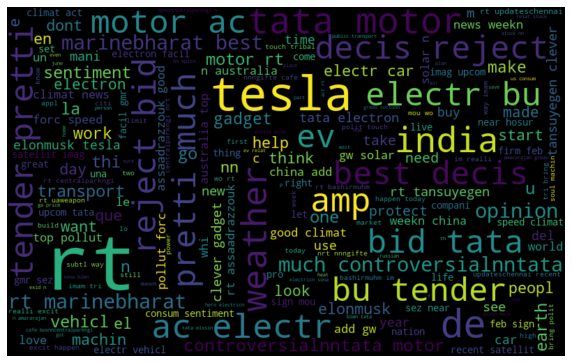

In [19]:
from wordcloud import WordCloud 
all_words= ' '.join([text for text in combine['tidy_tweet']])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

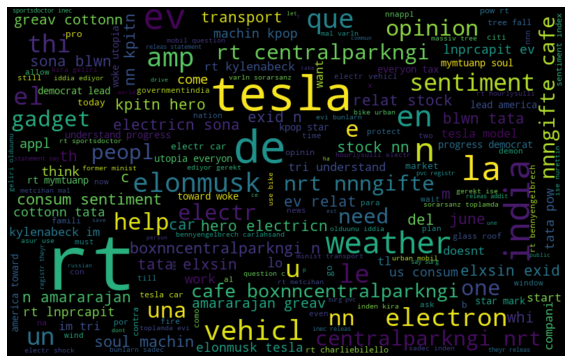

In [20]:
positive_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

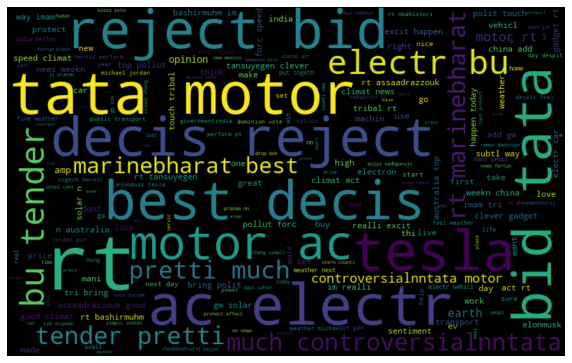

In [21]:
negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x= combine['tidy_tweet']
y= combine['label']
combine=combine.fillna(0)
x, x_test, y, y_test = train_test_split(x,y,stratify=y,test_size=0.3,random_state=69)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim

In [24]:
vec = CountVectorizer(stop_words='english')
x= vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [25]:
print("X_train_shape : ",x.shape)
print("X_test_shape : ",x_test.shape)
print("y_train_shape : ",y.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1022, 4371)
X_test_shape :  (439, 4371)
y_train_shape :  (1022,)
y_test_shape :  (439,)


In [26]:
df = pd.DataFrame(data=x_test,columns = vec.get_feature_names())
df.head(1000)

C:\Users\rajib\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aalyaqoot,aampm,aappunjab,aapresid,aar,aaronhil,aaronmcgrattan,aav,ab,aba,...,zeidyyeh,zeuseolog,ziegler,zifin,zijn,ziox,ziyaretleri,ziyaretlerimizd,zonal,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x,y)

MultinomialNB()

In [28]:
model.score(x_test,y_test)

0.7266514806378133

In [29]:
#model_naive = MultinomialNB().fit(X_train,y_train)
predicted_naive = model.predict(x_test)

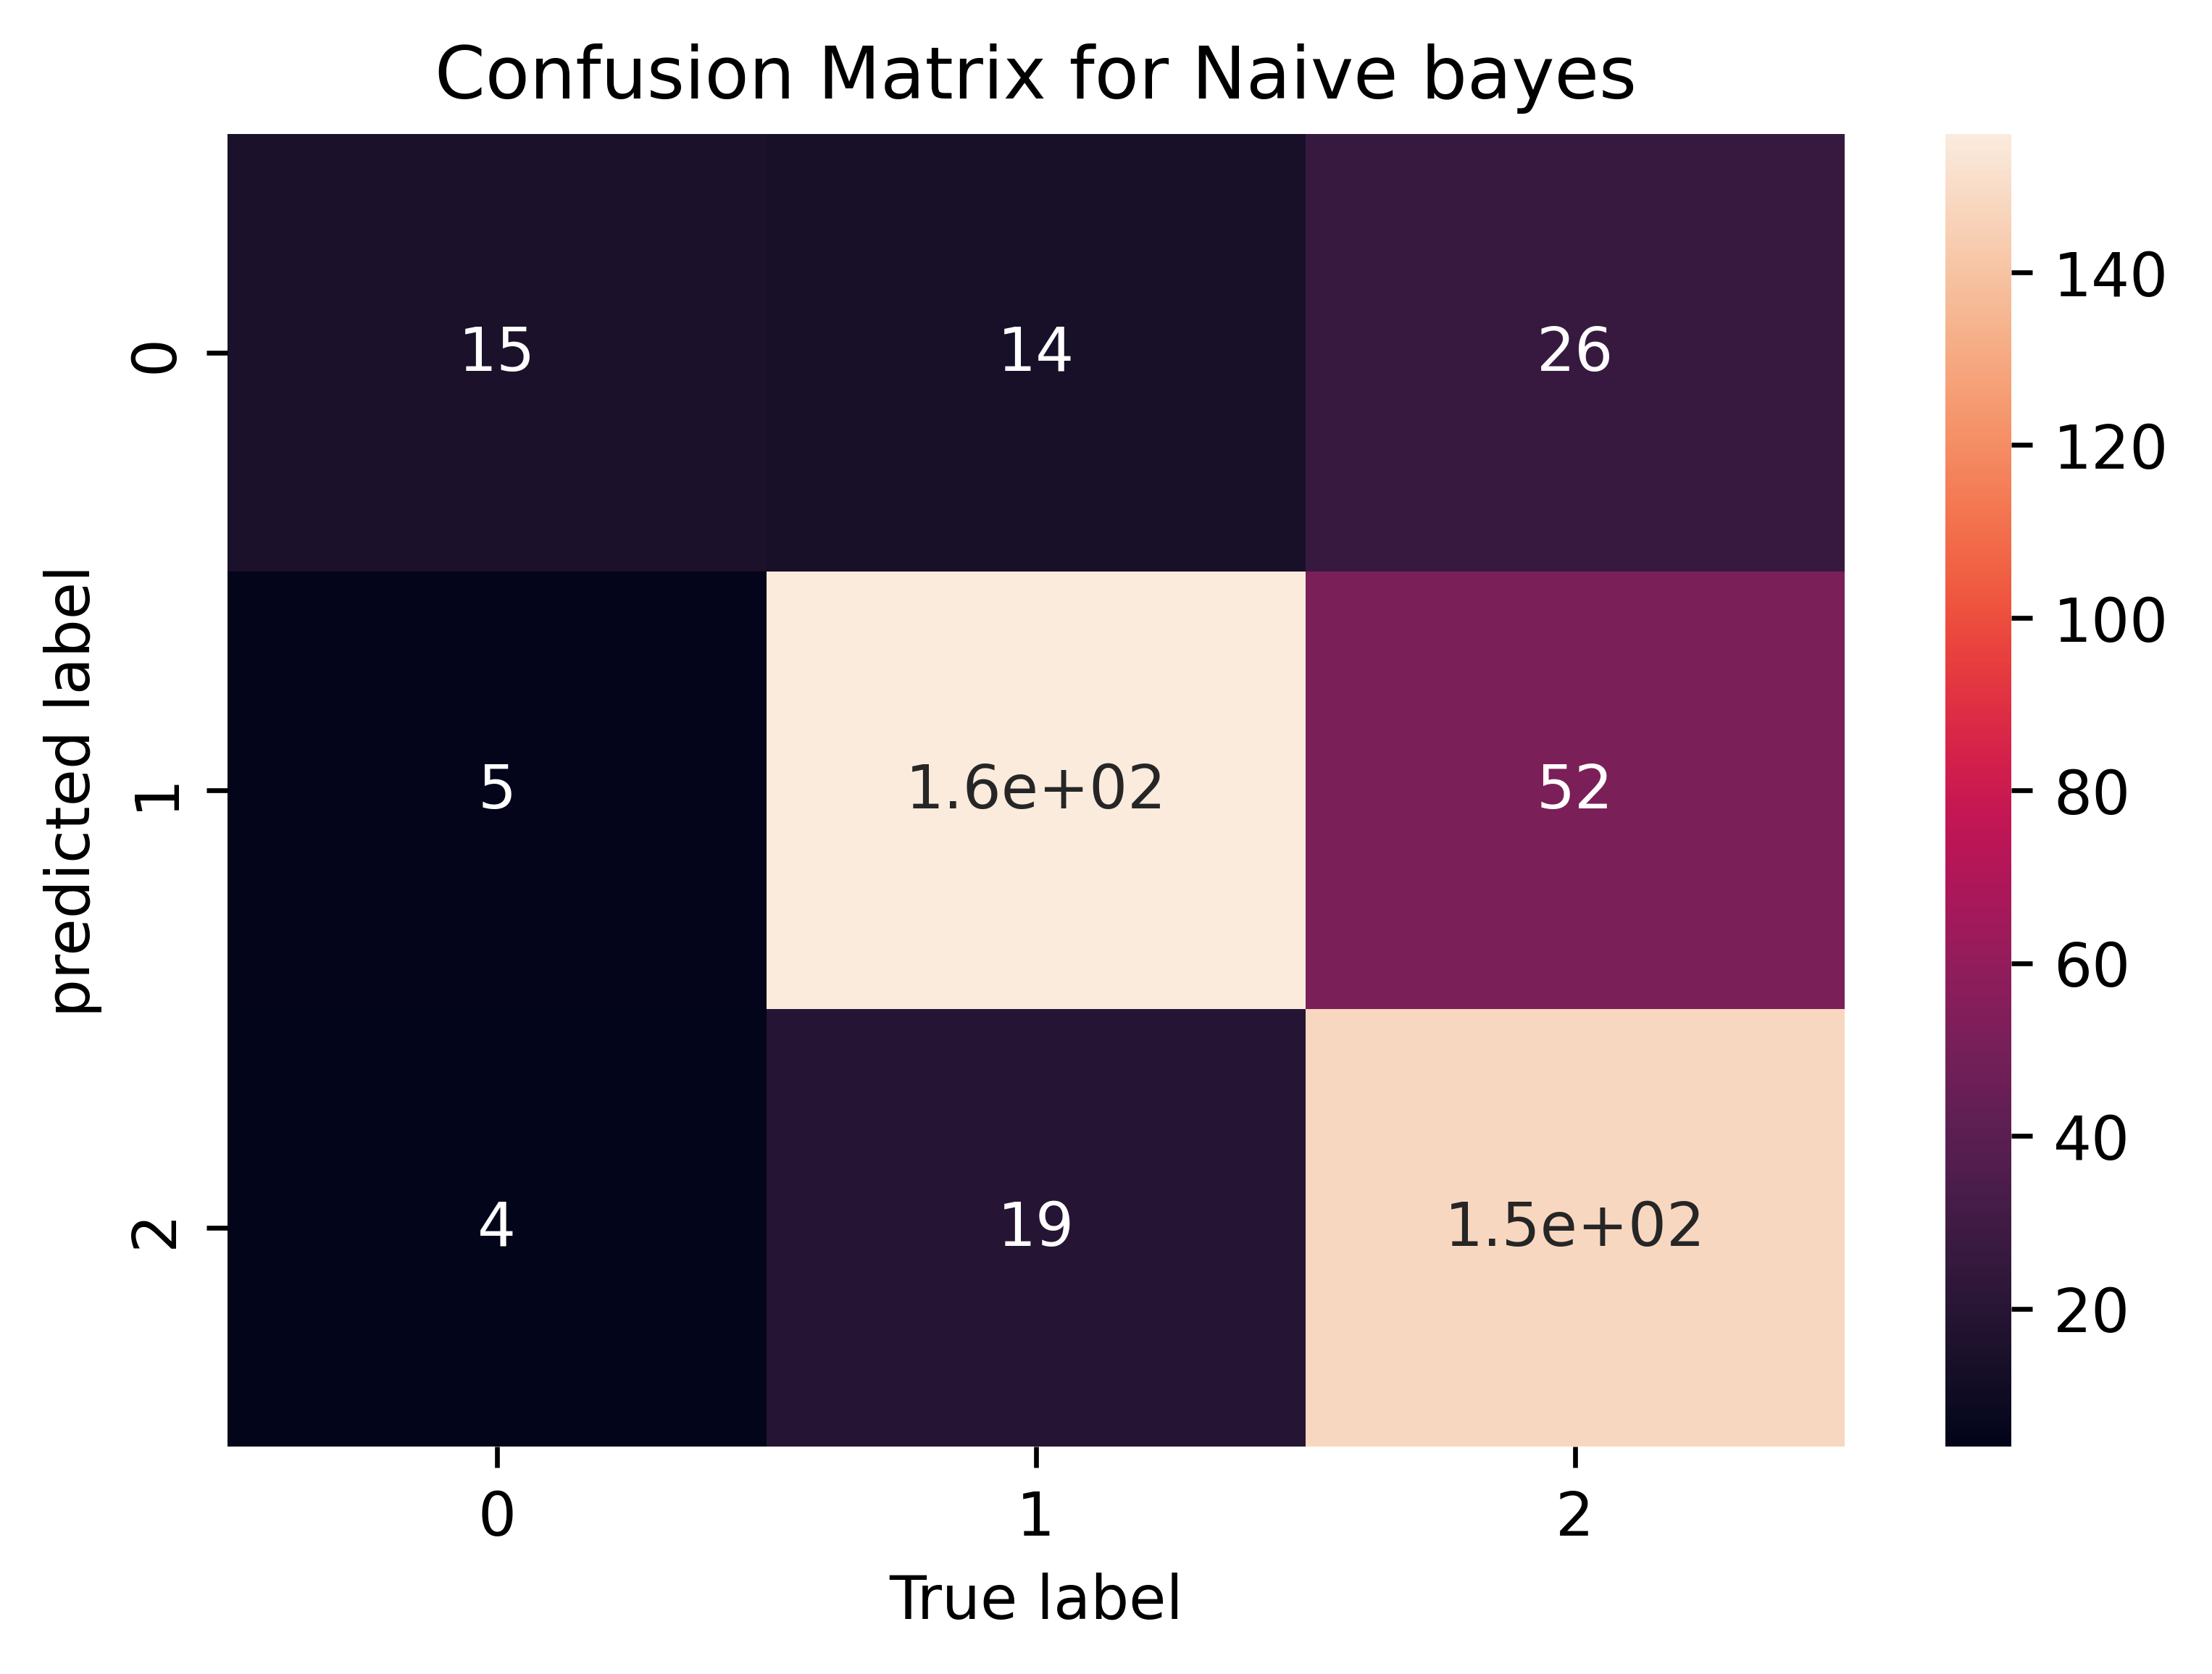

[[ 15  14  26]
 [  5 156  52]
 [  4  19 148]]


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(dpi=600)
mat = confusion_matrix(y_test,predicted_naive)
sns.heatmap(mat, annot=True)
plt.title("Confusion Matrix for Naive bayes")
plt.xlabel("True label")
plt.ylabel("predicted label")
plt.savefig("confusion.png")
plt.show()
print(confusion_matrix(y_test,predicted_naive))

In [31]:
print(classification_report(y_test,predicted_naive))

              precision    recall  f1-score   support

          -1       0.62      0.27      0.38        55
           0       0.83      0.73      0.78       213
           1       0.65      0.87      0.75       171

    accuracy                           0.73       439
   macro avg       0.70      0.62      0.63       439
weighted avg       0.73      0.73      0.71       439



In [32]:
import tweepy
plt.style.use('fivethirtyeight')
api_key = "mBKdAjPm6FwgFERjqnUyJuzAV"
api_key_secret = "Csa99o5CFnCxYRKRsiIC09S07rg2B6UbI5z3rH5LIizRfHv0fx"
access_token= "3258089731-rrzDnbqccBdS4DIqVVfeTGBEHLywdbrmlmnuZUu"
access_token_secret = "CzZQVk7yhHRyrGkFi19m6uzRcHdIMUYQhf9UErEHEZO0n"
authenticate = tweepy.OAuthHandler(api_key, api_key_secret)
authenticate.set_access_token(access_token, access_token_secret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)
search_words = "#EVINDIA" + " -filter:retweets"
date_since = "2019-03-01"
date_until = "2022-05-14"

posts = tweepy.Cursor(api.search_tweets,
              q=search_words ,
              lang="en",
              tweet_mode='extended').items(100)

In [33]:
predict = pd.DataFrame( [tweet.full_text for tweet in posts] , columns = ['tweet'])
predict.head()

,tweet
0,Who is the EV gyani here??\nLet us know your answer in the comment section. \nStay tuned for more EV quizzes!!\n\n#quiztime #evquiz #evindia #electricvehicle #electriccar #electricscooter #evcharg...
1,🔑 and 🤳 both works effectively on all Greendhan EV’s🔥\n\nCall +91-9006714888 for Dealership Enquiries.\n\n#electricvehicle #greendhan #ev #evindia #happycustomers #meme #mememarketing #pollution #...
2,Drive home a new experience with Nexon EV Prime!!\nLet us know in the comments if you have any doubts. \n@TataMotors\n#tatamotors #tatanexon #nexonev #electricvehicle #evindia #evchargingstation #...
3,"Where's your cosmopolitan zeal? Bring it back with iron and steel. Presenting ""Cosmo"" - your everyday ride that comes with a greater purpose and better perks!\n\n#eveium #electricvehicles #ebikes ..."
4,Live Pollution aatank-free life by choosing Greendhan EV’s.😍\n\nCall +91-9006714888 for Dealership Enquiries.\n\n#ElectricVehicles #PollutionFree #NoPollutants #GreenDhan #EV #EVIndia #Franchise #...


In [34]:
predict['tweet'] = np.vectorize(remove_pattern)(predict['tweet'],"@[\w]*")
def clean_URL(data):
    return re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.S+?", "", data)
predict['tweet'] = predict['tweet'].apply(lambda x: clean_URL(x))
predict.head(10)

,tweet
0,Who is the EV gyani hereLet us know your answer in the comment section Stay tuned for more EV quizzesquiztime evquiz evindia electricvehicle electriccar electricscooter evcharging firstev evchargi...
1,and both works effectively on all Greendhan EVsCall 919006714888 for Dealership Enquirieselectricvehicle greendhan ev evindia happycustomers meme mememarketing pollution pollutants co2 emission ...
2,Drive home a new experience with Nexon EV PrimeLet us know in the comments if you have any doubts tatamotors tatanexon nexonev electricvehicle evindia evchargingstation nexonev electriccar yocharge
3,Wheres your cosmopolitan zeal Bring it back with iron and steel Presenting Cosmo your everyday ride that comes with a greater purpose and better perkseveium electricvehicles ebikes cosmo highspee...
4,Live Pollution aatankfree life by choosing Greendhan EVsCall 919006714888 for Dealership EnquiriesElectricVehicles PollutionFree NoPollutants GreenDhan EV EVIndia Franchise Dealer
5,The one true solution to all your regular vehicle problem Switch to GreendhanCall 919006714888 for Dealership EnquiriesEV GreenDhanEV EVIndia ElectricVehicles ElectricVehicle EVRevolution GoElectr...
6,Start your own MultiBrand Showroom with GreenDhan Were offering franchise opportunity to launch a completely electricvehicle multibrand showroom of your ownFor more information call 919006714888ev...
7,Greendhan is an exclusive MultiBrand Electric Vehicle Chain Call 919006714888 for Dealership Enquirieselectricvechiles electricvechilesindia greendhan greendhanev ev evindia
8,Save your wallet and environment by switching to sustainable resources With OEVICs AC and DC EV charger you can charge your vehicle quicklyinfocom91 80089 87948oevic electricalvehicle electricalve...
9,How does EV pricing workevchargingbusiness evbusiness evchargingstation publiccharging evcharging evcharginginfrastructure evindia evindustry yocharge


In [35]:
model.predict(vec.transform(predict['tweet']))

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [36]:
predict['label']=model.predict(vec.transform(predict['tweet']))

In [37]:
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 
predict['Subjectivity'] = predict['tweet'].apply(getSubjectivity)

In [38]:
predict.head()

,tweet,label,Subjectivity
0,Who is the EV gyani hereLet us know your answer in the comment section Stay tuned for more EV quizzesquiztime evquiz evindia electricvehicle electriccar electricscooter evcharging firstev evchargi...,0,0.500000
1,and both works effectively on all Greendhan EVsCall 919006714888 for Dealership Enquirieselectricvehicle greendhan ev evindia happycustomers meme mememarketing pollution pollutants co2 emission ...,0,0.462500
2,Drive home a new experience with Nexon EV PrimeLet us know in the comments if you have any doubts tatamotors tatanexon nexonev electricvehicle evindia evchargingstation nexonev electriccar yocharge,1,0.454545
3,Wheres your cosmopolitan zeal Bring it back with iron and steel Presenting Cosmo your everyday ride that comes with a greater purpose and better perkseveium electricvehicles ebikes cosmo highspee...,1,0.340000
4,Live Pollution aatankfree life by choosing Greendhan EVsCall 919006714888 for Dealership EnquiriesElectricVehicles PollutionFree NoPollutants GreenDhan EV EVIndia Franchise Dealer,1,0.500000


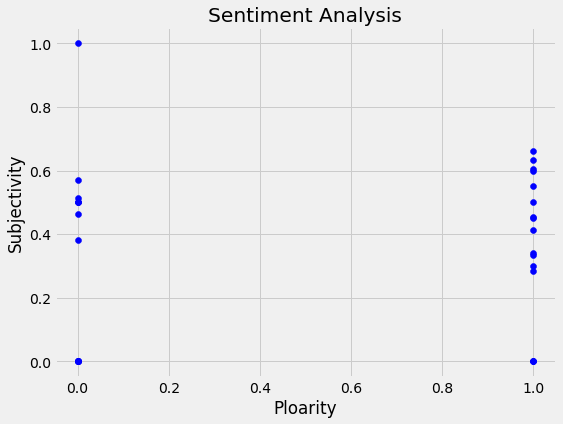

In [39]:
plt.figure(figsize=(8,6))
for i in range(0, predict.shape[0]):
 plt.scatter(predict['label'][i], predict['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Ploarity')
plt.ylabel('Subjectivity') 
plt.show()

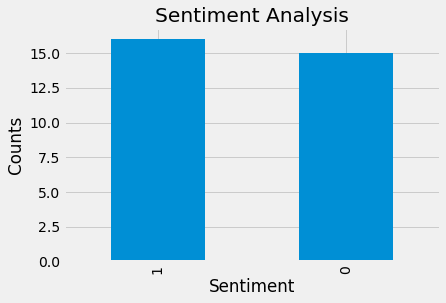

In [40]:
plt.title('Sentiment Analysis')
plt.xlabel("Sentiment")
plt.ylabel("Counts")
predict['label'].value_counts().plot(kind = 'bar')
plt.show()

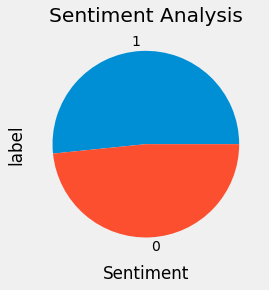

In [41]:
plt.title('Sentiment Analysis')
plt.xlabel("Sentiment")
plt.ylabel("Counts")
predict['label'].value_counts().plot(kind = 'pie')
plt.show()